# **Practica 4. Suavizamiento de series de tiempo.**

**Carrera:** Licenciatura en Ciencia de Datos

**Grupo:**  6AV1

**Materia:** Análisis de Series de Tiempo

**Docente:** Daniel Jiménez Alcantar

**Alumno:**  
* Aguilar Ramirez Carlos Francisco
* Arista Romero Juan Ismael
* Jiménez Flores Luis Arturo
* Vazquez Martin Marlene Gabriela


Fecha de última modificación: 20/03/2025

# **Explicación y exploración del data set**

El dataset utilizado en esta práctica contiene información sobre la recaudación global de las películas del Universo Cinematográfico de Marvel (MCU). Incluye los siguientes campos clave:


*   movie_id: Identificador único de cada película.
*   movie_name: Nombre de la película.
*   Phase_id: Fase del MCU a la que pertenece la película.


*   worldwide_box_office: Recaudación total en taquilla a nivel mundial (MDD).


*   año_lanzamiento: Año en el que se estrenó la película.

*   mes_estreno: Mes de estreno para evitar traslapes en el análisis temporal.
*   fecha_estreno: Fecha combinada (Año-Mes) en formato de serie de tiempo.


Este dataset nos permite analizar la evolución financiera del MCU a lo largo de los años, identificando tendencias y patrones en la recaudación de sus películas.












In [1]:
import pandas as pd

df = pd.read_csv("mcu.csv")
df.head()

,movie_id,movie_name,Phase_id,worldwide_box_office,año_lanzamiento,mes_estreno,fecha_estreno
0,1,Iron Man,1,585171547,2008,5,2008-05-01
1,2,The Incredible Hulk,1,265573859,2008,6,2008-06-01
2,3,Iron Man 2,1,621156389,2010,5,2010-05-01
3,4,Thor,1,449326618,2011,5,2011-05-01
4,5,Captain America: The First Avenger,1,370569776,2011,7,2011-07-01


**Preprocesamiento del data set**

In [2]:
# Verificar valores nulos en el dataset
print(df.isnull().sum())

movie_id                0
movie_name              0
Phase_id                0
worldwide_box_office    0
año_lanzamiento         0
mes_estreno             0
fecha_estreno           0
dtype: int64


In [3]:
# Verificar la cantidad de filas duplicadas
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


# **Construcción de la serie de tiempo**

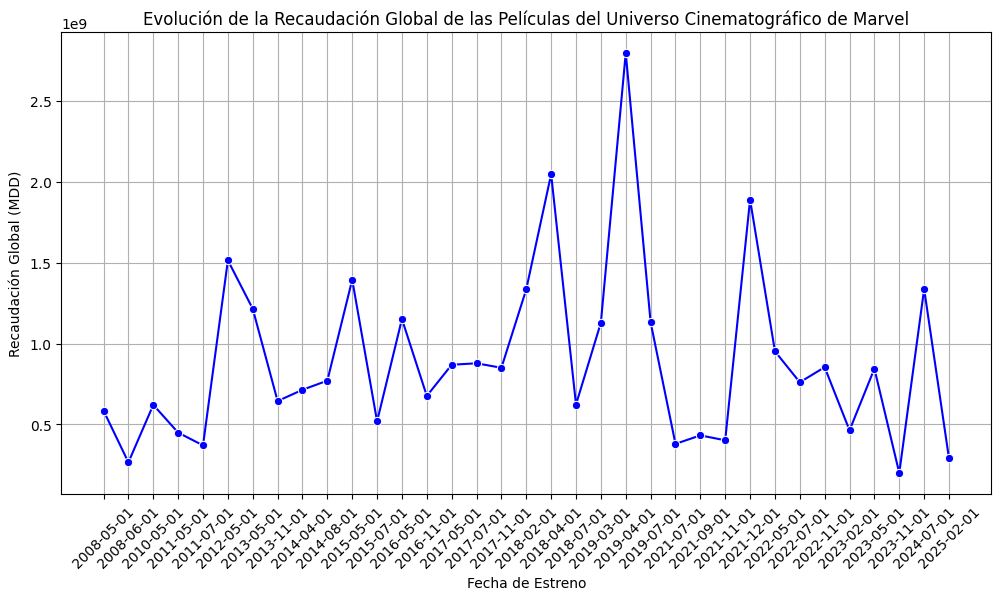

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por fecha de estreno
df = df.sort_values(by="fecha_estreno")

# Crear el gráfico de serie de tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["fecha_estreno"], y=df["worldwide_box_office"], marker="o", color="b")

# Personalización del gráfico
plt.title("Evolución de la Recaudación Global de las Películas del Universo Cinematográfico de Marvel")
plt.xlabel("Fecha de Estreno")
plt.ylabel("Recaudación Global (MDD)")
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()


# **Suavizamiento por promedio móvil simple.**

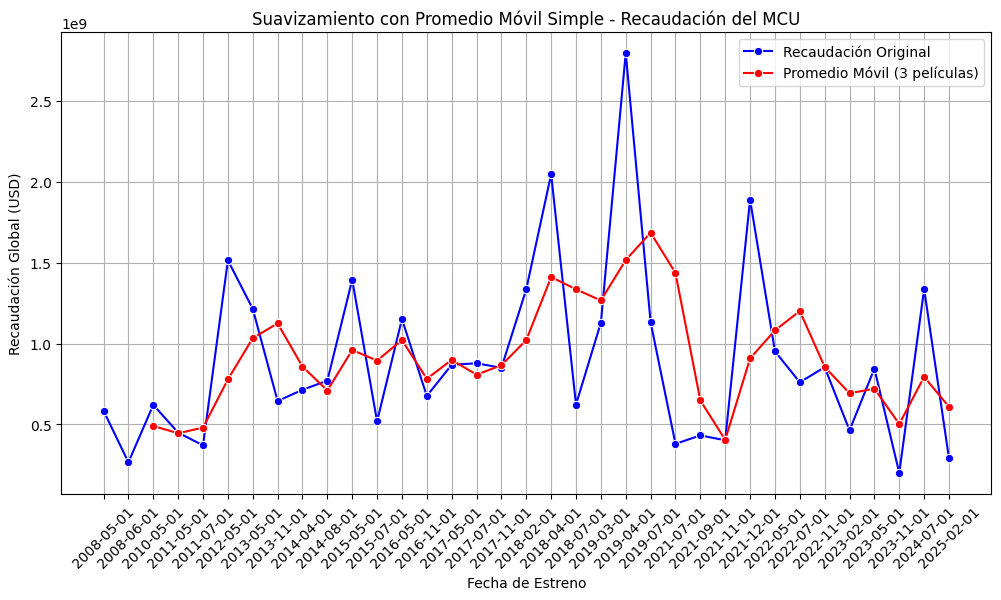

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "mcu.csv"
df = pd.read_csv(file_path)

# Ordenar por fecha de estreno
df = df.sort_values(by="fecha_estreno")

# Definir el tamaño de la ventana para el Promedio Móvil Simple
window_size = 3

# Calcular el Promedio Móvil Simple (SMA)
df["SMA"] = df["worldwide_box_office"].rolling(window=window_size).mean()

# Graficar la serie de tiempo con SMA
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["fecha_estreno"], y=df["worldwide_box_office"], marker="o", label="Recaudación Original", color="b")
sns.lineplot(x=df["fecha_estreno"], y=df["SMA"], marker="o", label=f"Promedio Móvil ({window_size} películas)", color="r")

# Personalización del gráfico
plt.title("Suavizamiento con Promedio Móvil Simple - Recaudación del MCU")
plt.xlabel("Fecha de Estreno")
plt.ylabel("Recaudación Global (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# **Suavizamiento por promedio móvil ponderado.**

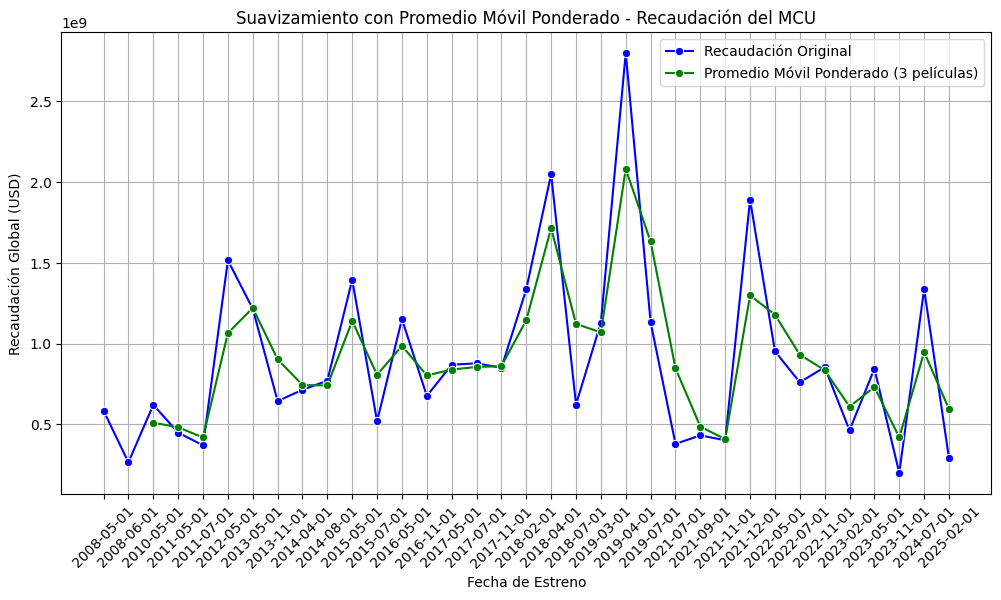

In [9]:
import numpy as np

# Definir los pesos para el promedio móvil ponderado (WMA)
weights = np.array([0.1, 0.3, 0.6])  # Mayor peso a las películas más recientes

# Calcular el WMA manualmente
def weighted_moving_average(values, weights):
    return np.convolve(values, weights[::-1], mode='valid')

# Aplicar WMA a la columna de recaudación
df["WMA"] = np.nan  # Inicializar la columna con NaN para mantener el tamaño
df.loc[window_size-1:, "WMA"] = weighted_moving_average(df["worldwide_box_office"], weights)

# Graficar la serie de tiempo con WMA
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["fecha_estreno"], y=df["worldwide_box_office"], marker="o", label="Recaudación Original", color="b")
sns.lineplot(x=df["fecha_estreno"], y=df["WMA"], marker="o", label=f"Promedio Móvil Ponderado ({window_size} películas)", color="g")

# Personalización del gráfico
plt.title("Suavizamiento con Promedio Móvil Ponderado - Recaudación del MCU")
plt.xlabel("Fecha de Estreno")
plt.ylabel("Recaudación Global (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# **Suavizamiento exponencial simple.**

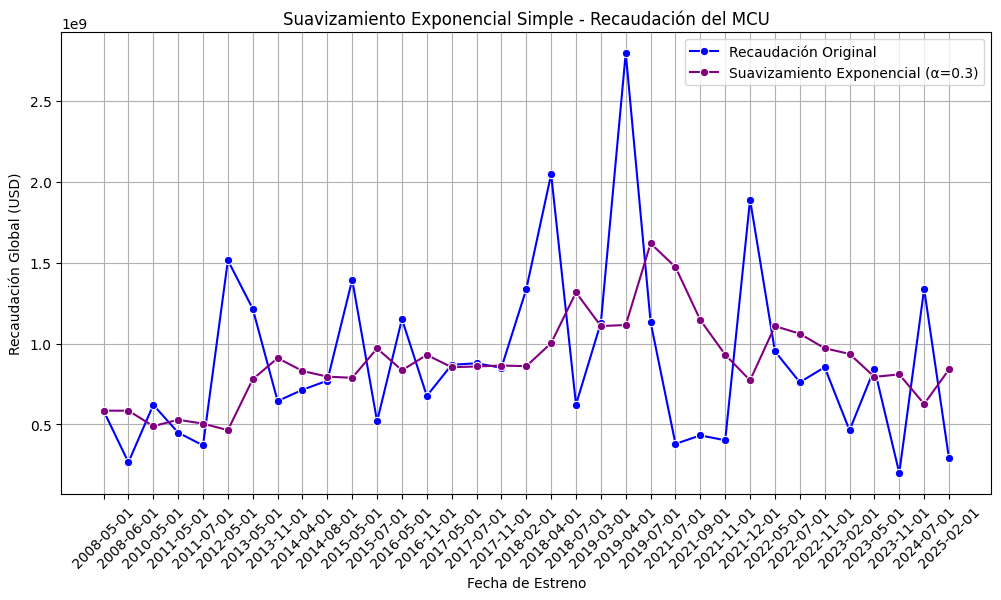

In [10]:
import statsmodels.api as sm

# Definir el factor de suavizamiento alfa (cuánto peso tienen los datos recientes)
alpha = 0.3

# Aplicar Suavizamiento Exponencial Simple (SES)
df["SES"] = sm.tsa.SimpleExpSmoothing(df["worldwide_box_office"]).fit(smoothing_level=alpha, optimized=False).fittedvalues

# Graficar la serie de tiempo con SES
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["fecha_estreno"], y=df["worldwide_box_office"], marker="o", label="Recaudación Original", color="b")
sns.lineplot(x=df["fecha_estreno"], y=df["SES"], marker="o", label="Suavizamiento Exponencial (α=0.3)", color="purple")

# Personalización del gráfico
plt.title("Suavizamiento Exponencial Simple - Recaudación del MCU")
plt.xlabel("Fecha de Estreno")
plt.ylabel("Recaudación Global (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


# **Suavizamiento por descomposición**

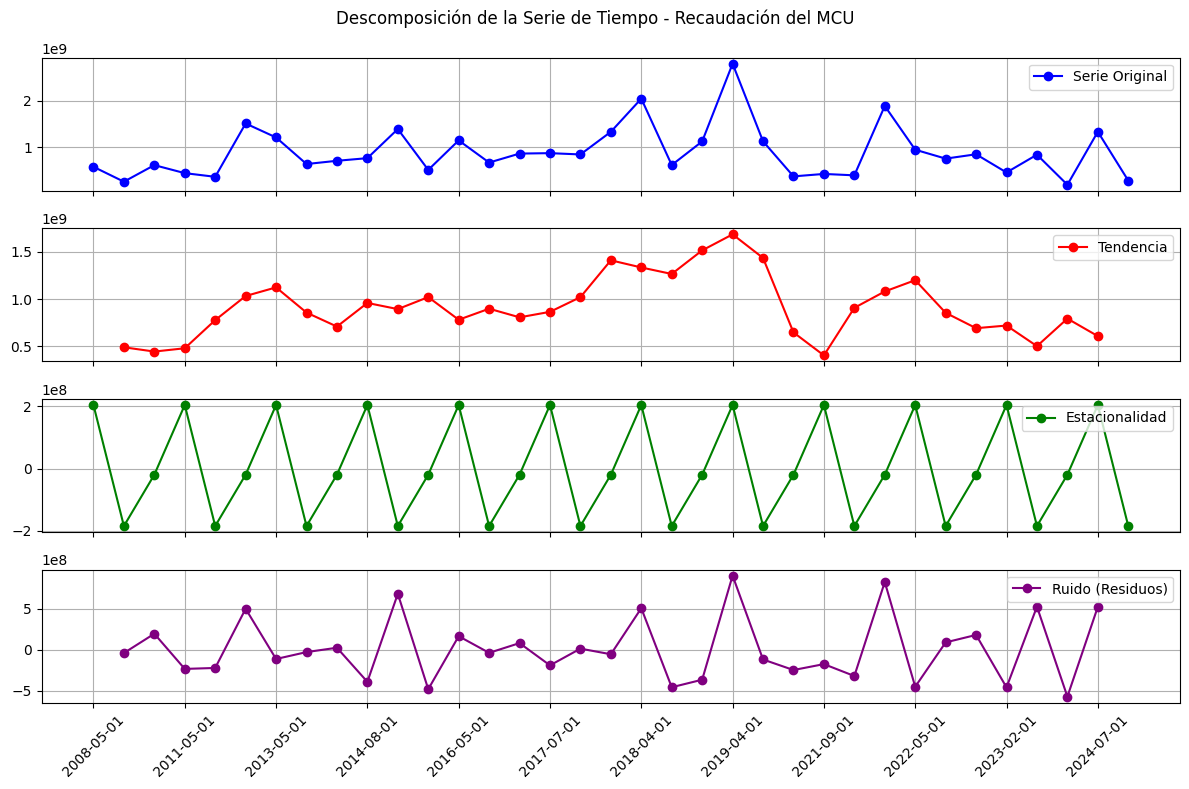

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar la descomposición de la serie de tiempo (aditiva)
decomposition = seasonal_decompose(df["worldwide_box_office"], model="additive", period=3)

# Configurar la figura
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Serie original
axes[0].plot(df["fecha_estreno"], df["worldwide_box_office"], marker="o", color="b", label="Serie Original")
axes[0].legend()
axes[0].grid(True)

# Tendencia
axes[1].plot(df["fecha_estreno"], decomposition.trend, marker="o", color="r", label="Tendencia")
axes[1].legend()
axes[1].grid(True)

# Estacionalidad
axes[2].plot(df["fecha_estreno"], decomposition.seasonal, marker="o", color="g", label="Estacionalidad")
axes[2].legend()
axes[2].grid(True)

# Ruido
axes[3].plot(df["fecha_estreno"], decomposition.resid, marker="o", color="purple", label="Ruido (Residuos)")
axes[3].legend()
axes[3].grid(True)

# Mejorar la visualización del eje X
plt.xticks(rotation=45)  # Rotar las etiquetas
plt.xticks(df["fecha_estreno"][::3])  # Mostrar solo algunas etiquetas en el eje X

# Título general
plt.suptitle("Descomposición de la Serie de Tiempo - Recaudación del MCU")
plt.tight_layout()
plt.show()
